# Linear Bandit on Real Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from linMAB import linearUCB, random_policy, greedy_policy
from linearmab_models import LinearMABModel, ColdStartMovieLensModel
SEED = 1

### Cold Start Movie

In [2]:
movie_model = ColdStartMovieLensModel(random_state=SEED, noise=0.1)

- __Setting $\alpha$__

In [8]:
alphas = [2, 2.5, 3, 3.5, 4]
mean_regrets = {}
mean_norms = {}
for alpha in alphas:
    mean_regrets[alpha], mean_norms[alpha] = linearUCB(movie_model, lambda_=1, alpha = alpha)

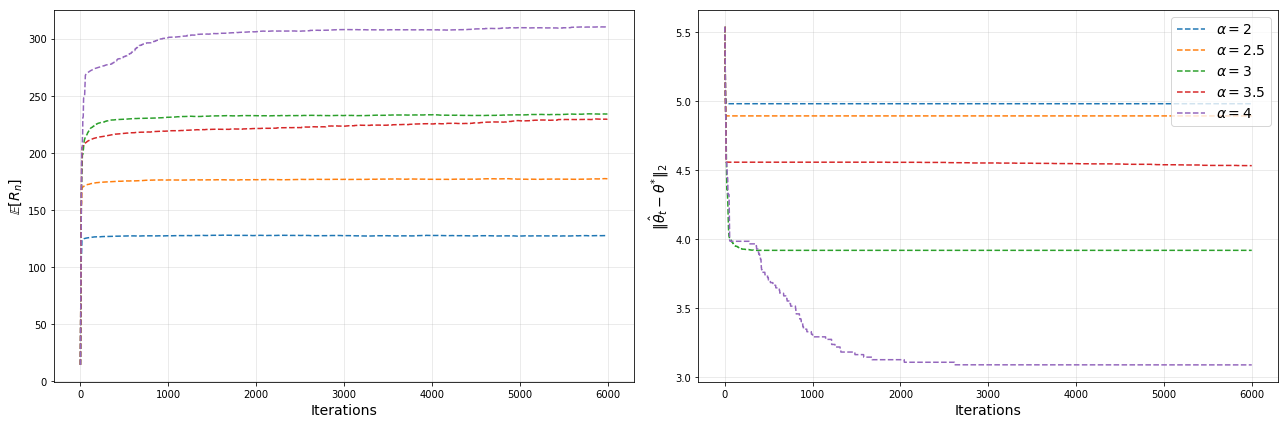

In [28]:
FONTSIZE=14

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

for alpha in alphas:
    ax[0].plot(np.cumsum(mean_regrets[alpha]), linestyle='--', label=r"$\alpha={}$".format(alpha))
    ax[1].plot(mean_norms[alpha],  linestyle='--', label=r"$\alpha={}$".format(alpha))
ax[0].grid(alpha=0.3)
ax[0].set_ylabel(r"$\mathbb{E}[R_{n}]$", size=FONTSIZE)
ax[0].set_xlabel("Iterations", size=FONTSIZE)
ax[0].tick_params(axis='both', labelsize=10)
ax[1].set_ylabel(r"$|\!|\hat{\theta}_{t}-\theta^{*}|\!|_{2}$", size=FONTSIZE)
ax[1].set_xlabel("Iterations", size=FONTSIZE)
ax[1].grid(alpha=0.3)
ax[1].tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.legend(fontsize=14, loc='upper right')

We will hence set $\alpha=4$ because even though cumulative regrets is greater, the $\ell_{2}$ norm converges faster and toward a lower value

- __Policies comparison :__

In [6]:
mean_regrets_linUCB, mean_norms_linUCB = linearUCB(movie_model)
mean_regrets_random, mean_norms_random = random_policy(movie_model)
mean_regrets_greedy, mean_norms_greedy = greedy_policy(movie_model)

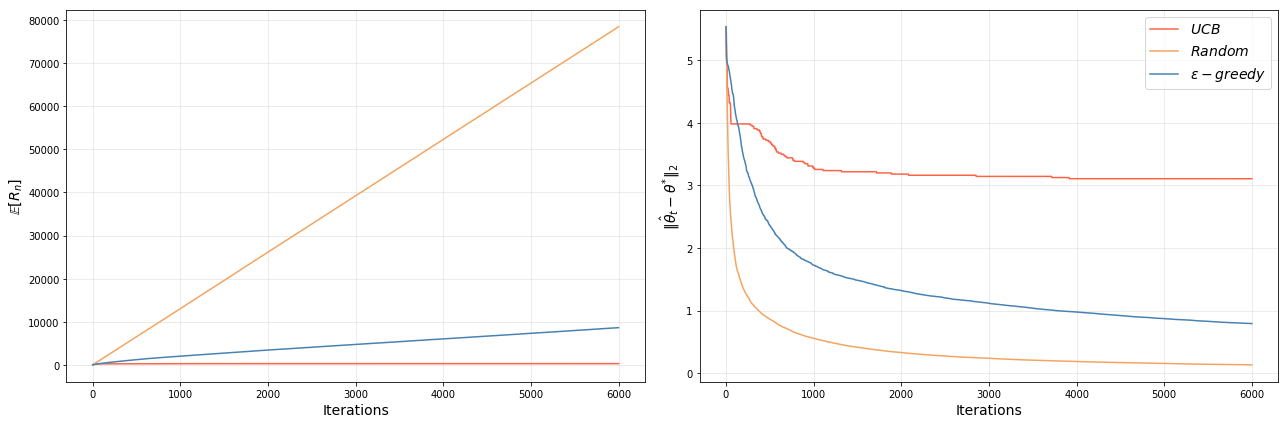

In [11]:
FONTSIZE=14

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(np.cumsum(mean_regrets_linUCB), label=r"$UCB$", color="tomato")
ax[0].plot(np.cumsum(mean_regrets_random), label=r"$Random$", color="sandybrown")
ax[0].plot(np.cumsum(mean_regrets_greedy), label=r"$\varepsilon-greedy$", color="steelblue")
ax[1].plot(mean_norms_linUCB, label=r"$UCB$", color="tomato")
ax[1].plot(mean_norms_random, label=r"$Random$", color="sandybrown")
ax[1].plot(mean_norms_greedy, label=r"$\varepsilon-greedy$", color="steelblue")
ax[0].grid(alpha=0.3)
ax[0].set_ylabel(r"$\mathbb{E}[R_{n}]$", size=FONTSIZE)
ax[0].set_xlabel("Iterations", size=FONTSIZE)
ax[0].tick_params(axis='both', labelsize=10)
ax[1].set_ylabel(r"$|\!|\hat{\theta}_{t}-\theta^{*}|\!|_{2}$", size=FONTSIZE)
ax[1].set_xlabel("Iterations", size=FONTSIZE)
ax[1].grid(alpha=0.3)
ax[1].tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.legend(fontsize=14, loc='upper right')

- __Random strategy :__
> Fast convergence toward real $\theta$ value, but accumulating much more regrets than the others. Indeed, its total randomness ensures a wide exploration of all sequences of arm pulling and hence convergence toward the real $\theta$. However, it's also its main backward as it is going to take a lot of "wrong" decisions.

- __UCB :__
> With the chosen value of $\alpha$, we don't have convergence toward the right $\theta$. However, regrets are much lower as expected. A right balance between regret and convergence value must be taken into account when setting $\alpha$. For example, greater values of $\alpha$ would have led to more regret but we would have been closer to the real $\theta$

- __$\varepsilon$-greedy__:
> As it is pulling the "best" arm with probability $1-\varepsilon$ and exploring other possiblities with probability $\varepsilon$, this strategy yields intermediate but satisfying results in both regrets and convergence (not perfect though)